# 関数の振る舞い
$$f(x) = e^{-x}\cos x$$
の振る舞いを見る．

 ## forループ1

In [1]:
for i ∈ 1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


In [2]:
for i ∈ 1:2:10
    println(i)
end

1
3
5
7
9


In [3]:
for i ∈ 10:-1:1
    println(i)
end

10
9
8
7
6
5
4
3
2
1


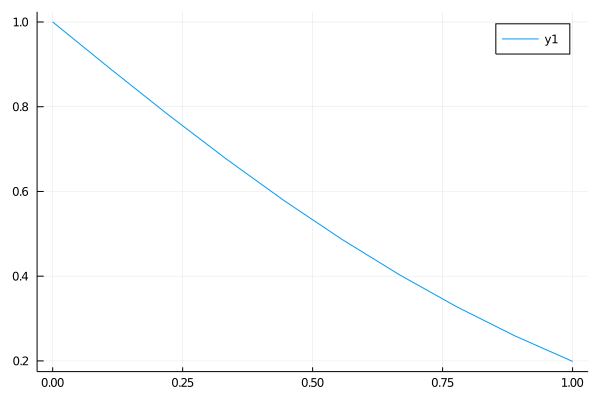

In [13]:
using Plots

f(x) = ℯ^(-x) * cos(x)
n = 10

x_plot = []
f_plot = []

for i ∈ 1:n
    x = (i-1) / (n-1)
    append!(x_plot, x)
    append!(f_plot, f(x))
end
plot(x_plot, f_plot)

## forループ2

In [6]:
f(x) = ℯ^(-x) * cos(x)
n = 10

xs = range(0, 1, length=n)

for x ∈ xs
    println(f(x))
end

println(xs)

1.0
0.8893212978081703
0.7810473385536082
0.6770912391787048
0.5788895016933947
0.4874652454693099
0.403487973312516
0.3273292414832505
0.2591138198344662
0.19876611034641298
0.0:0.1111111111111111:1.0


## ベクトルや行列の要素ごとに計算

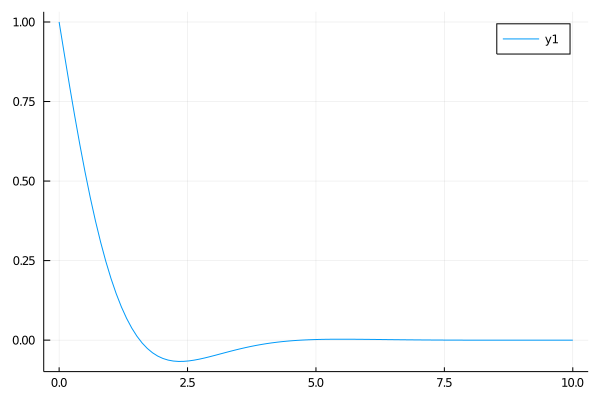

In [17]:
f(x) = cos(x) * ℯ^(-x)

n = 100

xs = range(0, 10, length=n)

plot(xs, f.(xs))

# 級数の和
$$f(x) = \sum_{n=0}^{\infty}\frac{1}{n!}x^n$$

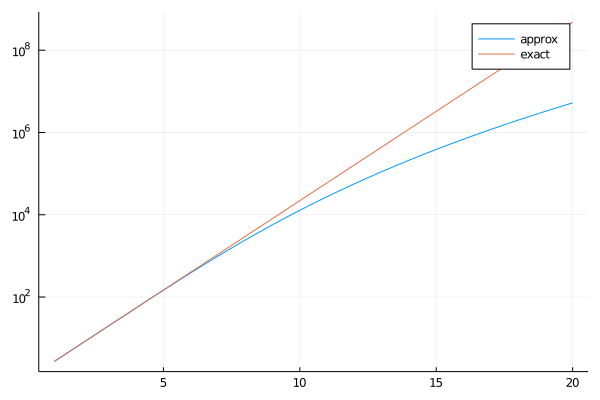

In [31]:
using Plots
f(x, nmax) = sum([x^n / factorial(n) for n∈0:nmax])

xs = 1:0.5:20
plot(xs, f.(xs, 10), label="approx", yaxis=:log)
plot!(xs, ℯ.^(xs), label="exact")

In [33]:
function f(x, nmax)
    fsum = 0
    for n ∈ 0:nmax
        fsum += x^n / factorial(n)
    end
    return fsum
end
f(2, 10)

7.388994708994708

## if文による精度コントロール

In [34]:
a = 3
if a > 4
    println("a>4")
elseif a == 4
    println("a=4")
else
    println("a<4")
end

a<4


In [37]:
function f(x, eps)
    fsum = 0
    fsumold = 0
    hi = 1
    h = 0
    n = 0
    
    while hi > eps
        fsum += x^n / factorial(n)
        hi = abs(fsum - fsumold)/abs(fsum)
        fsumold = fsum
        n += 1
    end
    return fsum, n
end
fapp, n = f(2, 1e-4)
println(fapp - ℯ^2, "\n","$n")
        

-6.138993594273501e-5
11


# Integral
$$I = \frac{1}{2\pi}\int_{-\pi}^{\pi}dkf(k)$$
で，
$$f(k)= \sin k +k^2$$
を計算する．

この積分は手でできて，
$$I = \frac{1}{2\pi}\cdot\frac{2}{3}\pi^3\sim3.29$$
となる．

In [39]:
using QuadGK

f(x) = sin(x) + x^2
fsum2 = quadgk(f, -π, π)[1] / (2 * π)
exact = ((π)^3/3 - (-π)^3/3)/(2*π)
println("quadgk $(fsum2), exact $(exact)")

quadgk 3.2898681336964524, exact 3.2898681336964524


In [40]:
quadgk(f, -π, π)

(20.670851120199877, 0.0)

# 微分方程式

$$\frac{du}{dt} = 1.01u$$
を$u(t=0)=0.5$で$t=0\to1$まで解く．

In [42]:
using DifferentialEquation

f(u, p, t) = 1.01 * u
u0 = 1/2

tspan = (0.0, 1.0)
prob = ODEProbrem(f, u0, tspan)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)]
nt = 50
t = range(0.0, stop=1.0, length=nt)
for i ∈ 1:nt
    println("t=$(t[i]), solution: $(sol(t[i])), exact solution: $(0.5 * ℯ^(1.01t[i]))")
end

ArgumentError: [91mArgumentError: Package DifferentialEquation not found in current path:[39m
[91m- Run `import Pkg; Pkg.add("DifferentialEquation")` to install the DifferentialEquation package.[39m
